In [1]:
%pylab inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.fftpack as transform

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Se genera el array de ceros
cuadrado=np.zeros((1024,1024))
#print cuadrado

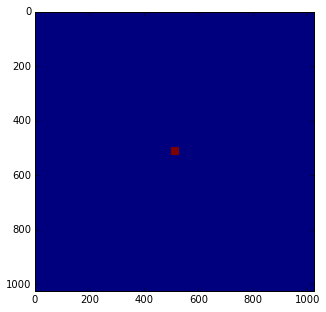

In [3]:
#Remplaza los valores del cudrado central por unos
for i in range (496,528):
    for j in range(496,528):
        cuadrado[i][j]=1
#Las lineas comentadas debajo ayudan a verificar que se hallan cambiado los valores
##unos=np.count_nonzero(cuadrado)
##print unos

#se muestra el cuadrado con el centro de valor distinto
plt.figure(figsize=(5,5))
imshow(cuadrado)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log


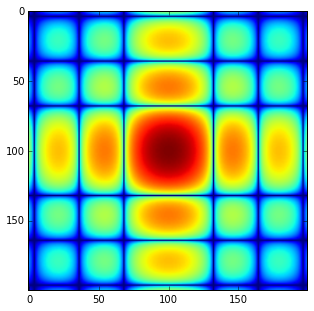

In [4]:
#Se aplica la transformada a la matriz de ceros y unos
cuadradoTransformado=numpy.fft.fft2(cuadrado)

#Se aplica la funcion shift para el cambio de cordenadas
cuadradoShift=transform.fftshift(cuadradoTransformado)

#se crea un arreglo para el sector de interferencia a mostrar
cuadrado200=np.zeros((200,200))

##print cuadradoTransformado

#Se obtiene el valor absoluto de los vectores de la transformada con el cambio de cordenadas
cuadradoAbsoluto=abs(cuadradoShift)

##print cuadradoAbsoluto

#se asigna los valores del patron de interferncia a el array cuadrado
for i in range(412,612):
    for j in range(412,612):
        cuadradoAbsoluto[i][j]=cuadradoAbsoluto[i][j]+1

#se saca el logaritmo del patro deseado
cuadradoLog=log(cuadradoAbsoluto)
for i in range(412,612):
    for j in range(412,612):
        cuadrado200[i-412][j-412]=cuadradoLog[i][j]

##print cuadrado200

#Muestra la imagen de interferencia
plt.figure(figsize=(5,5))
imshow(cuadrado200)

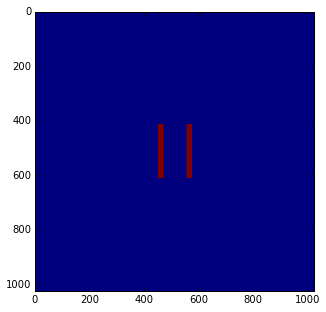

In [5]:
#Array de ceros
rendija = np.zeros((1024,1024))
for i in range (450,470):
    for j in range (412,612):
        rendija[j][i]=1
for i in range (554,574):
    for j in range (412,612):
        rendija[j][i]=1
plt.figure(figsize=(5,5))
imshow(rendija)
##unos=np.count_nonzero(rendija)
##print unos

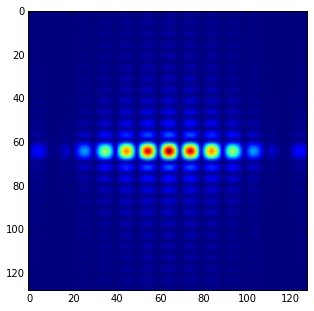

In [6]:
rendijaTransformada=np.fft.fft2(rendija)
rendijaShift=transform.fftshift(rendijaTransformada)
rendijaAbsoluto=abs(rendijaShift)
interferencia=np.zeros((128,128))
for i in range(448,576):
    for j in range(448,576):
        interferencia[j-448][i-448]=rendijaAbsoluto[j][i]
#print interferencia

plt.figure(figsize=(5,5))
imshow(interferencia)

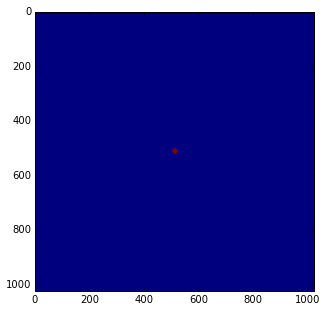

In [7]:
circulo=np.zeros((1024,1024))

#cordenadasx, cordenasdasy = np.meshgrid(range(1024),range(1024))
radio=1024*0.01
#radioCuadrado=radio**2
#centro=512
#normaCuadrada=((cordenadasx-centro)**2+(cordenasdasy-centro)**2)
#circulo[normaCuadrada<radioCuadrado]=1
for i in range(502,522):
    for j in range(502,522):
        if (((i-512)**2+(j-512)**2)<(radio**2)):
            circulo[i][j]=1
plt.figure(figsize=(5,5))
imshow(circulo)
#plt.xlim(400,600)
#plt.ylim(400,600)

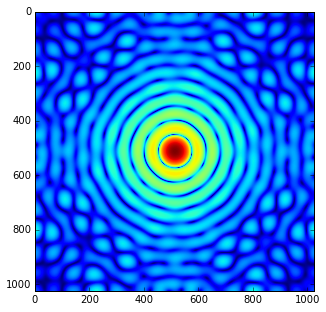

In [8]:
circuloTransformado=abs(np.fft.fft2(circulo))
circuloShift=transform.fftshift(circuloTransformado)
circuloAbsoluto=(circuloShift)
circuloAbsoluto=(circuloAbsoluto)**2
plt.figure(figsize=(5,5))
imshow(np.log(circuloAbsoluto+1))

10.24


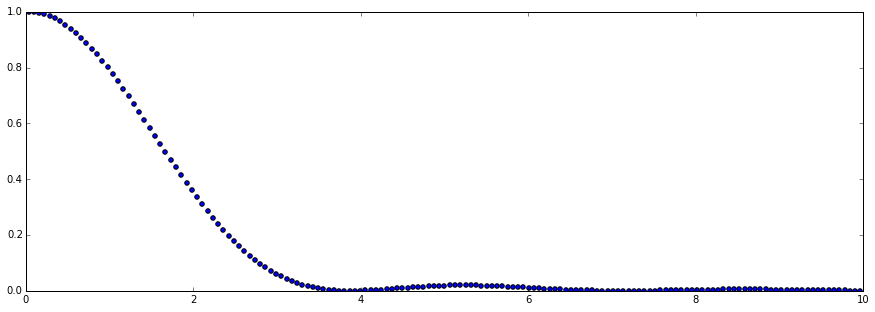

In [56]:
filaCentral= circuloAbsoluto[512]
filaCentraln=abs(filaCentral)
valorMax = circuloAbsoluto[512,512]
valorMaxn=abs(valorMax)
intensidadNormalizada=filaCentraln/valorMaxn
ejeOrizontal=2*np.pi*0.01/1.*linspace(-512,512,1024)
plt.figure(figsize=(15,5))
plt.scatter(ejeOrizontal,intensidadNormalizada)
plt.xlim(0,10)
plt.ylim(0,1)
print radio

<function matplotlib.pyplot.show>

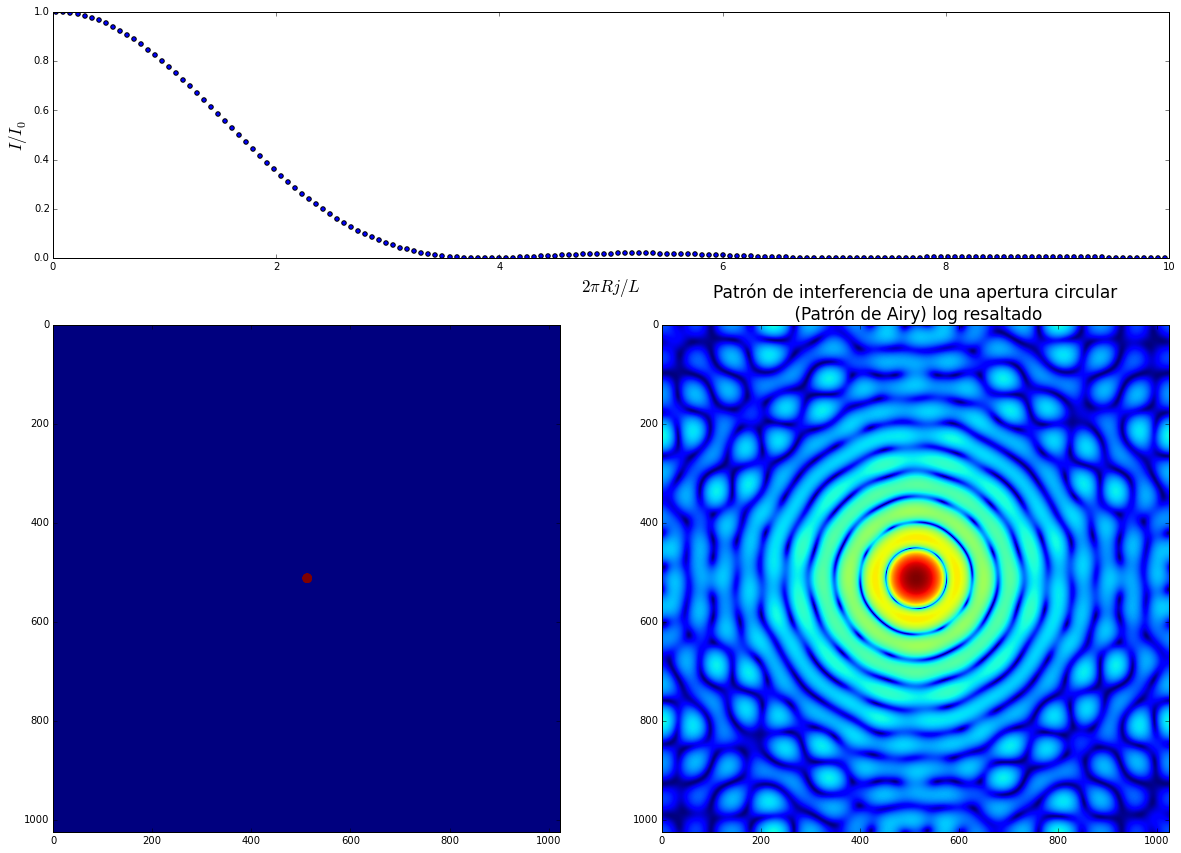

In [33]:
plt.figure(figsize=(20,15))
plt.subplot2grid((3,2),(0,0),colspan=2,rowspan=1)
plt.xlim(0,10)
plt.ylim(0,1)
plt.xlabel(r'$2 \pi R j/L$',fontsize=17)
plt.ylabel(r'$I/I_0$', fontsize=17)
plt.scatter(ejeOrizontal,intensidadNormalizada)
plt.subplot2grid((3,2),(1,1),rowspan=2)
plt.title(u'Patrón de interferencia de una apertura circular \n (Patrón de Airy) log resaltado', fontsize =17)
imshow(np.log(circuloAbsoluto+1))
plt.subplot2grid((3,2),(1,0),rowspan=2)
imshow(circulo)
plt.tight_layout
plt.show

In [117]:
rango=ejeOrizontal[ejeOrizontal>=0]
rango=rango[rango<12]

inicio=(np.where(ejeOrizontal==rango[0])[0])
final=(np.where(ejeOrizontal==rango[len(rango)-1])[0])
intensidad012=intensidadNormalizada[inicio:final+1]

pointerMaximos=np.r_[True, intensidad012[1:]>intensidad012[:-1]] & np.r_[intensidad012[:-1]>intensidad012[1:], True]
pointerMinimos=np.r_[True, intensidad012[1:]<intensidad012[:-1]] & np.r_[intensidad012[:-1]<intensidad012[1:], True]

posicionMinimos=np.where(pointerMinimos==True)[0]
posicionMaximos=np.where(pointerMaximos==True)[0]

minimos=intensidad012[posicionMinimos]
maximos=intensidad012[posicionMaximos]

preImagenMinimos=rango[posicionMinimos]
perImagenMaximos=rango[posicionMaximos]

maximos_tabla=[1,0.075,0.0042,0.0016]
minimos_tabla=[0,0,0]

ajuste=np.polyfit(rango,intensidad012,8)

print len(rango),len(intensidad012)
print "dato,", "dato tabla,", "diferencia,"
for i in range(0,3):
    print minimos[i],",", minimos_tabla[i],",", abs(minimos[i]-minimos_tabla[i])
for i in range(0,4):
    print maximos[i],",", maximos_tabla[i],",", abs(maximos[i]-maximos_tabla[i])
    
    

191 191
dato, dato tabla, diferencia,
8.79661020291e-05 , 0 , 8.79661020291e-05
9.02711273217e-05 , 0 , 9.02711273217e-05
0.000107771928509 , 0 , 0.000107771928509
1.0 , 1 , 0.0
0.0195044367901 , 0.075 , 0.0554955632099
0.00499050375418 , 0.0042 , 0.000790503754181
0.00191321044858 , 0.0016 , 0.000313210448581
